In [1]:
import numpy as np
import pickle
# test = np.frombuffer(data, dtype = "float32")
import matplotlib.pyplot as plt
import gpu_tracking
import tifffile
import pandas as pd
import trackpy as tp
arr = tifffile.imread("../emily_tracking/sample_vids/s_20.tif", key = 0).astype("float32")[None, ...]
coords = lambda df: df[["y", "x"]].to_numpy().T
from scipy.spatial import KDTree
with open("mine_processed", "rb") as file:
    data = file.read()
processed = np.frombuffer(data, dtype = "float32").reshape(2, 512, 512)[0]
with open("test", "rb") as file:
    data = file.read()
centers = np.frombuffer(data, dtype = "float32").reshape(2, 512, 512)
with open("tp_processed.pkl", "rb") as file:
    tp_processed = pickle.load(file).astype("float32")
with open("inp", "rb") as file:
    data = file.read()
frame = np.frombuffer(data, dtype = "float32").reshape(512, 512)
from scipy.ndimage import grey_dilation
import scipy.fft as fft

ValueError: cannot reshape array of size 66467664 into shape (2,512,512)

In [2]:
from scipy.signal import convolve
import scipy.signal as sgn

In [5]:
# with open("trackpy_reference/locations.pkl", "rb") as file:
#     tp_df = pickle.load(file)
diameter = 9
minmass = 0
separation = 10
my_df = pd.DataFrame(gpu_tracking.batch(arr[0:1], diameter, minmass = minmass, separation = separation), columns = ["frame", "mass", "y", "x"])
my_df = my_df.astype({"frame": int})[["frame", "y", "x", "mass"]]

tp_df = tp.batch(arr, diameter, threshold = 0, percentile = 0, minmass = minmass, characterize = False, separation = separation)

my_tree = KDTree(coords(my_df).T)
tp_tree = KDTree(coords(tp_df).T)
dists, inds = my_tree.query(coords(tp_df).T, distance_upper_bound = 0.01)

Frame 0: 929 features


In [6]:
my_df

,frame,y,x,mass
0,0,8.867070,61.276859,1064.447632
1,0,9.230811,438.942505,993.463074
2,0,9.744718,447.681702,677.319092
3,0,11.185135,227.674576,701.138489
4,0,10.446445,301.558044,608.553589
...,...,...,...,...
1206,0,498.052063,355.679932,802.113403
1207,0,498.293976,392.127533,709.902344
1208,0,500.146667,210.242081,408.125580
1209,0,499.469330,229.105042,464.342804


In [7]:
tp_df.sort_index()

,y,x,mass,frame
0,4.215499,74.683652,1037.041907,0
1,4.600000,270.109091,726.589871,0
2,4.206278,280.707025,736.497915,0
3,4.515483,410.471767,604.390666,0
4,4.617257,494.506637,995.207945,0
...,...,...,...,...
924,506.169284,181.959860,630.812116,0
925,506.290404,214.916667,435.953923,0
926,507.021053,339.286316,522.924529,0
927,506.582677,381.733858,699.067528,0


In [16]:
my_df

,frame,y,x,mass
0,0,11.741593,349.500702,811.161987
1,0,14.005610,284.227325,810.648804
2,0,13.710928,376.465485,814.466736
3,0,14.130193,427.918549,1070.288818
4,0,15.548744,193.997162,801.707275
...,...,...,...,...
398,0,493.845276,113.964684,1142.747192
399,0,494.058777,221.137192,828.158325
400,0,496.959900,248.419052,968.822021
401,0,498.052063,355.679932,802.113403


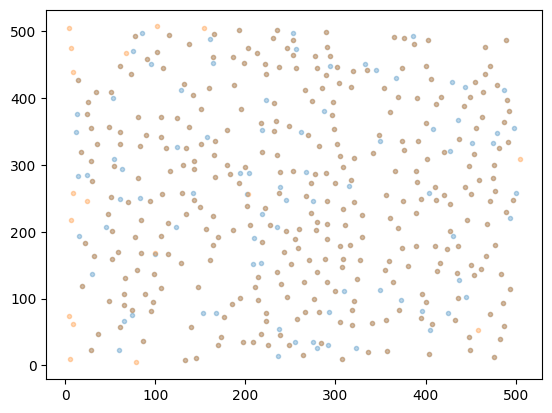

In [18]:
plt.plot(*coords(my_df), "C0.", alpha = 0.3)
plt.plot(*coords(tp_df), "C1.", alpha = 0.3)
# plt.plot(*next(it)[1].T, "C2.", alpha = 0.3)
# plt.plot(*coords(tp_df).T[dists == np.inf][26].T, "C2.", alpha = 0.3)

In [11]:
my_df

,frame,y,x,mass
0,0,8.867070,61.276859,1064.447632
1,0,9.230811,438.942505,993.463074
2,0,11.185135,227.674576,701.138489
3,0,11.741593,349.500702,811.161987
4,0,11.922229,341.975342,747.229126
...,...,...,...,...
644,0,497.107788,190.423584,787.688293
645,0,496.959900,248.419052,968.822021
646,0,498.052063,355.679932,802.113403
647,0,498.293976,392.127533,709.902344


In [19]:
tp.masks.gaussian_kernel(1, 4)[:, None]

array([[-0.99986617],
       [-0.99556814],
       [-0.94600887],
       [-0.75802855],
       [-0.60105653],
       [-0.75802855],
       [-0.94600887],
       [-0.99556814],
       [-0.99986617]])

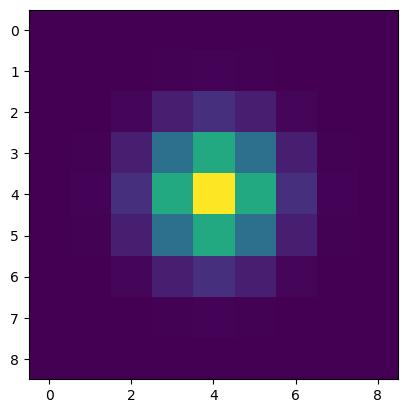

In [18]:
plt.imshow(tp.masks.gaussian_kernel(1, 4)[:, None] * tp.masks.gaussian_kernel(1, 4)[None, :])

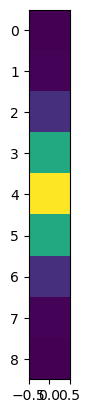

In [14]:
plt.imshow(tp.masks.gaussian_kernel(1, 4)[:, None])

In [10]:
print(len(my_df))
print(len(tp_df))

1151
1103


In [12]:

# my_tree.query_ball_tree(tp_tree, 0.05)

In [13]:
print((dists != np.inf).sum())
dists[dists != np.inf]
inds[dists != np.inf]
pass

948


In [15]:
it = enumerate(iter(coords(tp_df).T[dists == np.inf]))

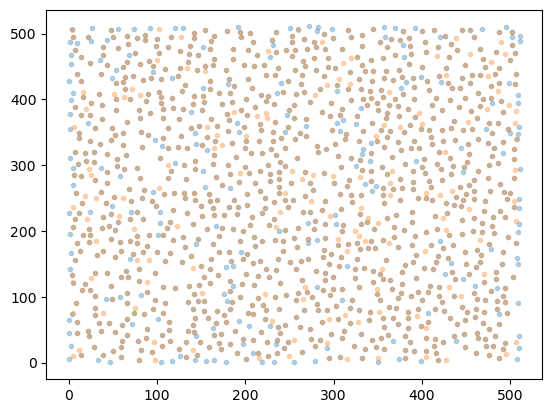

In [14]:
3//2

1

In [ ]:
tp_df

,y,x,mass
0,4.220573,74.692416,1054.478337
1,4.599053,270.108974,737.670025
2,4.623336,494.512906,1009.522685
3,5.025773,9.336279,922.702762
4,4.810352,121.785098,638.806371
...,...,...,...
1271,506.159615,181.958809,646.392449
1272,506.280800,214.909562,450.154686
1273,507.019594,339.288914,534.375697
1274,506.581047,381.735925,713.557145


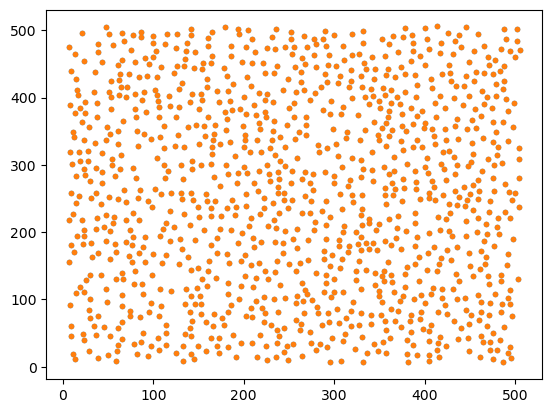

In [ ]:
plt.plot(*coords(my_df).T[inds[dists != np.inf]].T, ".", alpha = 1)
plt.plot(*coords(tp_df).T[dists != np.inf].T, ".", alpha = 1)